In [1]:
import os
import glob
import torch
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

import config
import dataset
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_files = glob.glob(os.path.join(config.DATADIR, "*.png"))
targets_orig = [x.split("/")[-1][9:14] for x in image_files]
targets = [[c for c in x] for x in targets_orig]
targets_flat = [c for clist in targets for c in clist]
lbl_enc = preprocessing.LabelEncoder()
lbl_enc.fit(targets_flat)
targets_enc = [lbl_enc.transform(x) for x in targets]
target_enc = np.array(targets_enc) + 1
(
    train_imgs,
    test_imgs,
    train_targets,
    test_targets,
    train_orig_targets,
    test_orig_targets
    ) = model_selection.train_test_split(
    image_files,
    target_enc,
    targets_orig,
    test_size=0.1,
    random_state=42
)
train_dataset = dataset.ClassificationDataset(
    image_path=train_imgs,
    targets=train_targets,
    resize=(config.IMAGE_HEIGHT,
            config.IMAGE_WIDTH
            ),)

In [5]:
npimg = train_dataset[100]["image"].numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


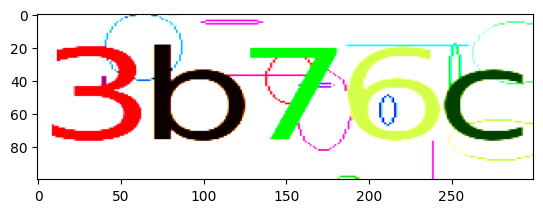

In [13]:
plt.imshow(np.transpose(npimg, (1, 2, 0)) )